<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

# Первая часть. Исследование & 

In [6]:
#Все import будут здесь!

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #Heatmap



from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier



pd.set_option('display.max_rows', None)

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

# Загрузка данных


In [2]:
data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'
print('Total number of cat_data in the dataset = ',len(cat_cols))

Total number of cat_data in the dataset =  16


In [4]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


<AxesSubplot:>

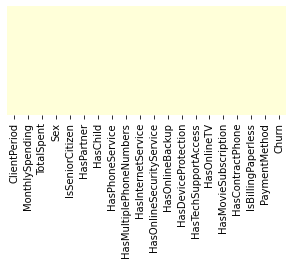

In [5]:
#проверяю NAN
plt.figure(figsize=(5,2))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [6]:
data.isnull().sum(axis = 0)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [8]:
# YOUR CODE
data["TotalSpent"] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data["TotalSpent"] = data["TotalSpent"].fillna(0).astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

# Анализ данных 

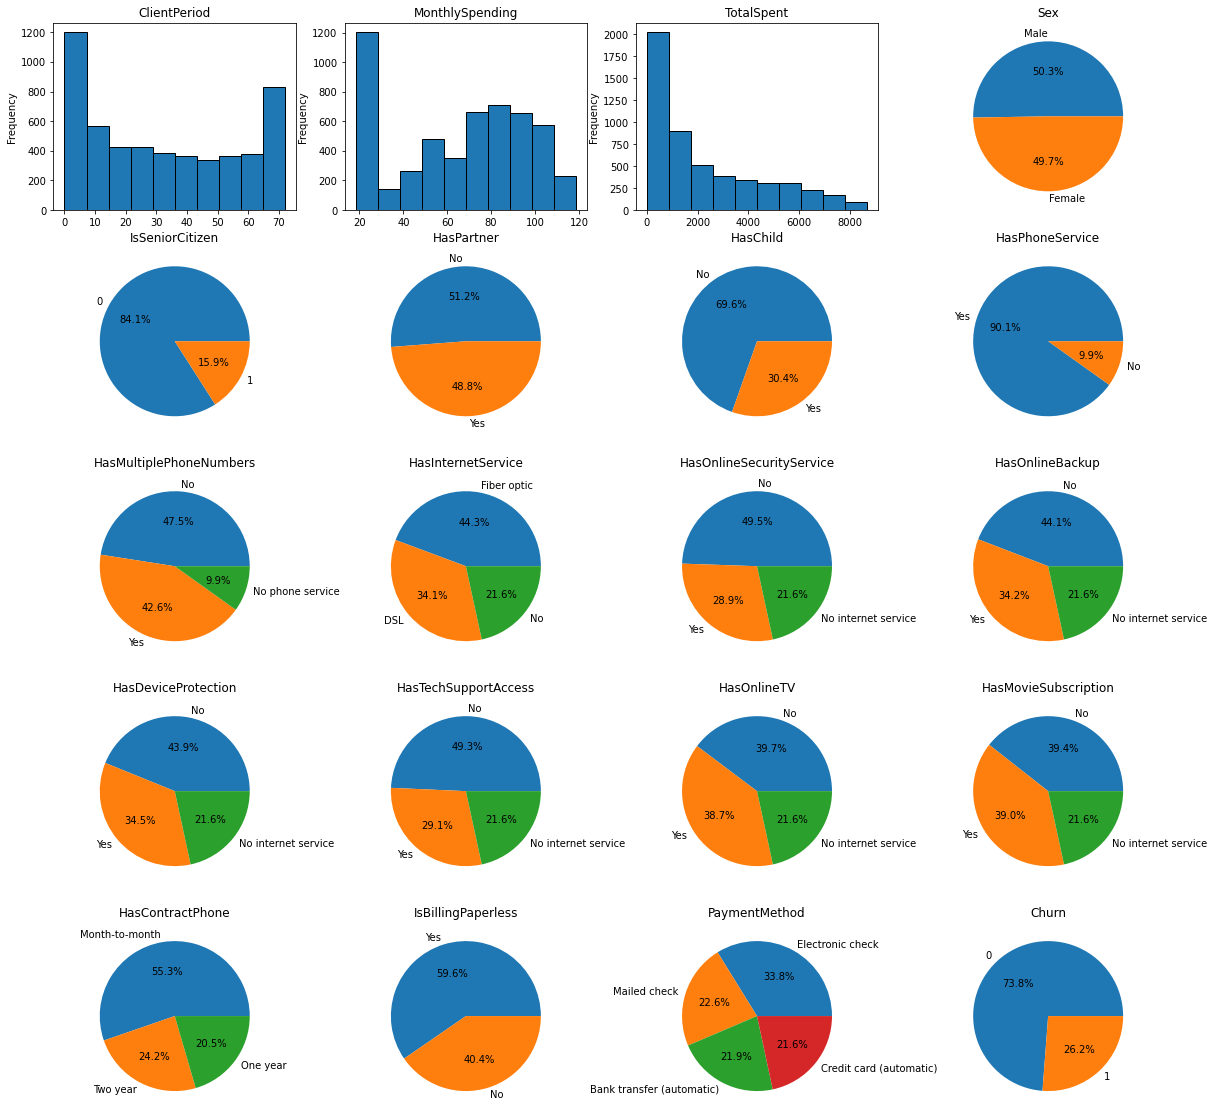

In [10]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
    else:
        data[col].plot(kind="hist", ec="black", ax=ax)

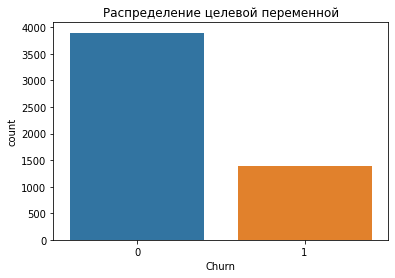

In [11]:
 # Посмотрим на распределение целевой переменной
plt.title('Распределение целевой переменной')
sns.countplot(x=data[target_col])
None

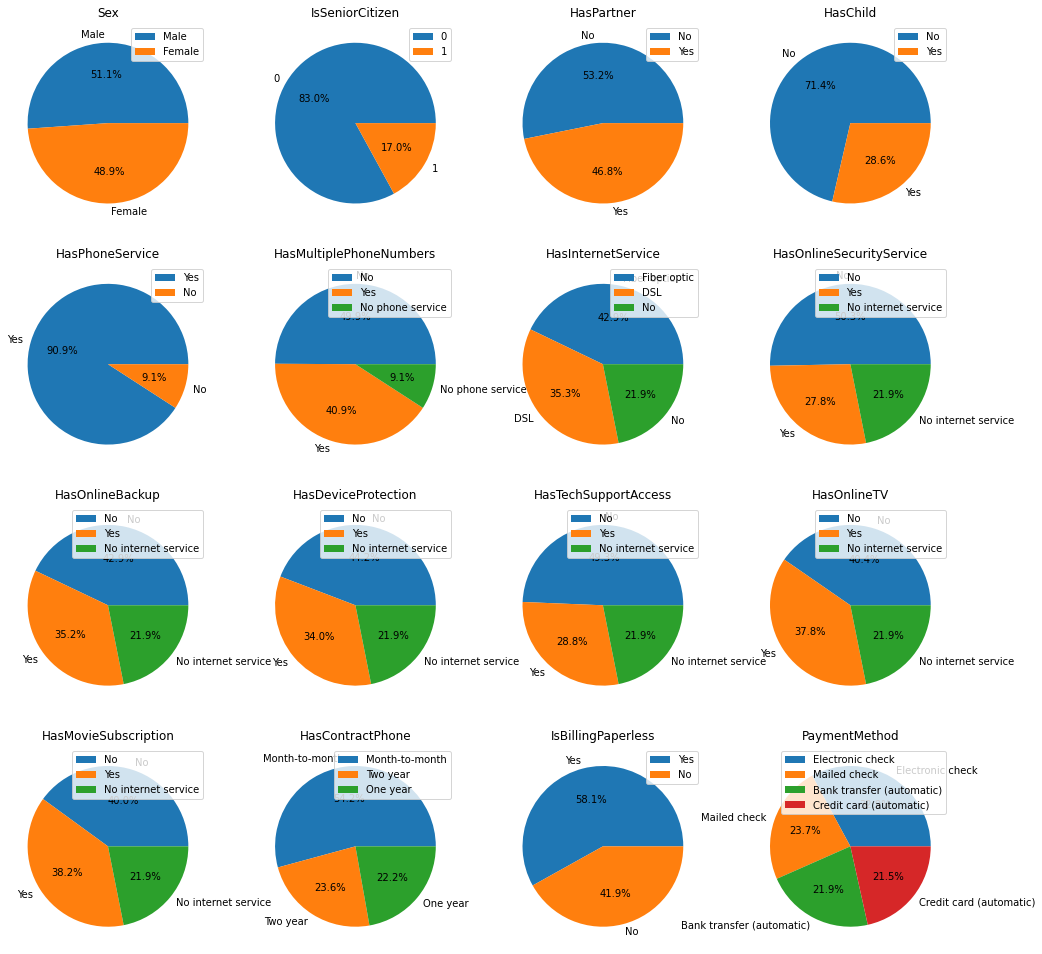

In [12]:
# посмотрим на тест
fig = plt.figure(figsize=(17,17))
for i in range(len(cat_cols)):
    test_i = test_data[cat_cols[i]].value_counts()
    plt.subplot(4, 4, i+1)
    plt.pie(test_i, labels = test_i.index, autopct='%1.1f%%')
    plt.title(cat_cols[i])
    plt.legend()

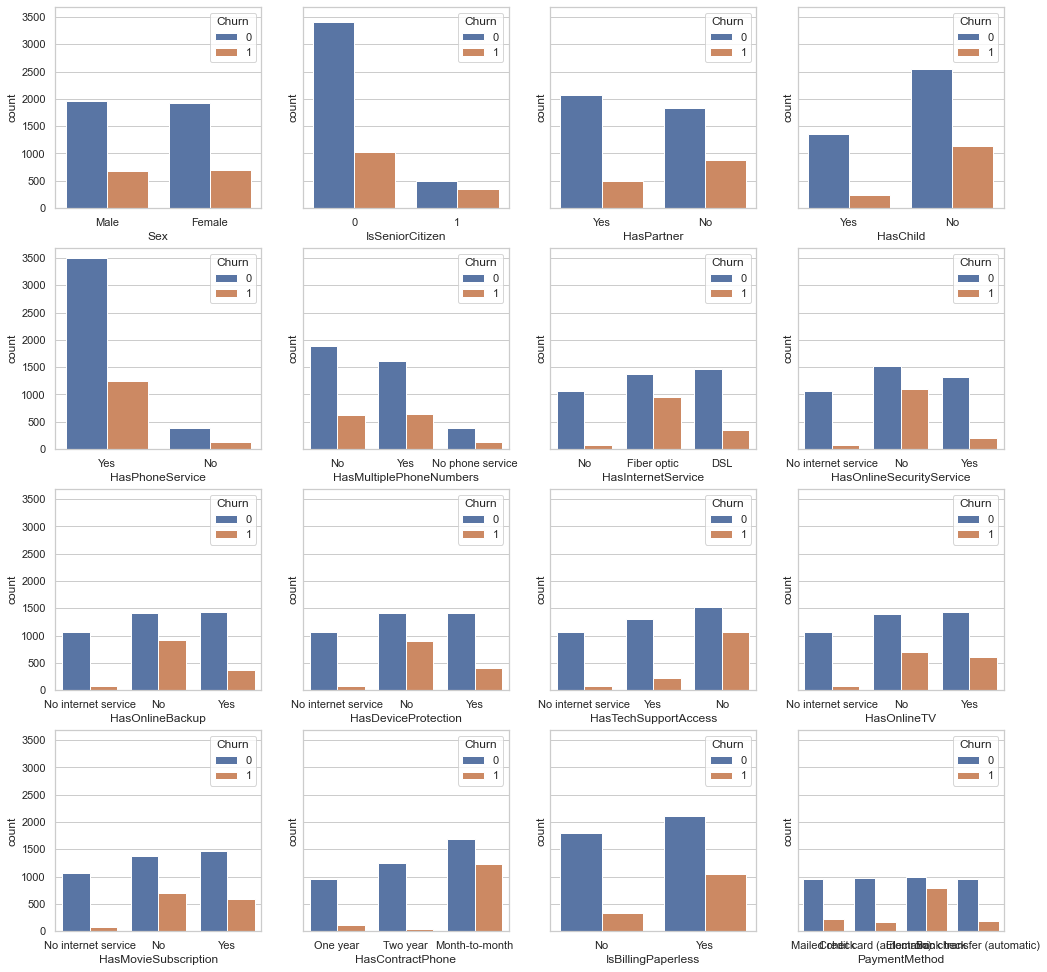

In [13]:
#Теперь необходимо посмотреть на распределение категориальных признаков относительно таргета.

sns.set_theme(style="whitegrid")
categor = len(cat_cols)
fig, axes = plt.subplots(4, 4, figsize=(17, 17), sharey=True)
for i in range(len(cat_cols)):
    sns.countplot(x=cat_cols[i], data=data, ax=axes[i//4, i%4],hue = target_col)
None

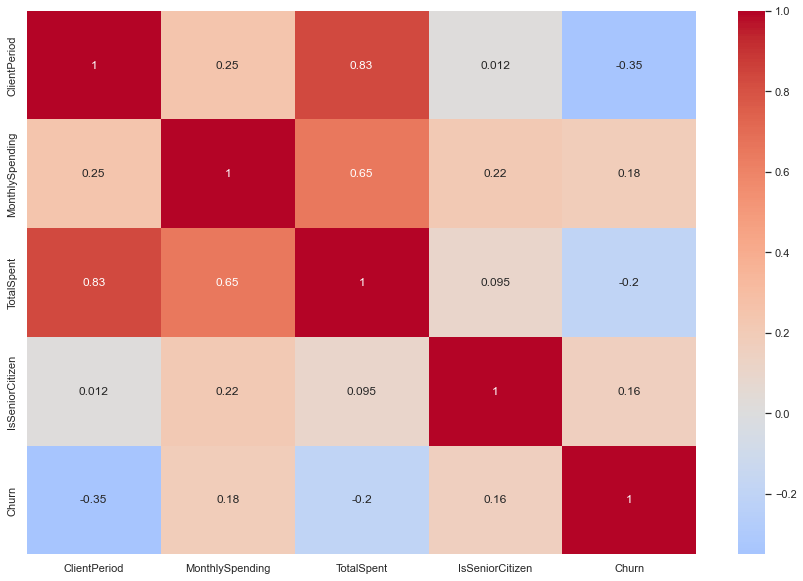

In [14]:
sns.heatmap(data=data.corr(),
            annot=True,
            cmap="coolwarm",
            center=0,
            ax=plt.subplots(figsize=(15,10))[1]);

# Применение моделей

In [15]:
dummy_features = pd.get_dummies(data[cat_cols])
X_origin = data[feature_cols]
print(dummy_features.shape)

(5282, 42)


In [16]:
LR_CV = LogisticRegressionCV(scoring='roc_auc')

In [17]:
scaled_data_num_cols=StandardScaler().fit_transform(data[num_cols])

In [18]:
X=pd.DataFrame(scaled_data_num_cols, columns=num_cols).join(dummy_features)
y= data[target_col]

In [19]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.183039,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.974768,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.124519,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970599,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [20]:
print(X.shape, X_origin.shape, y.shape)

(5282, 45) (5282, 19) (5282,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train.shape, y_train.shape

((4225, 45), (4225,))

In [22]:
grid_cv = GridSearchCV(LR_CV, param_grid={
                                    'penalty': ['l1', 'l2'],
                                    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
                                    },
                      scoring='roc_auc',
                      refit=True,
                      n_jobs=-1,
                      verbose=0)
grid_cv.fit(X_train, y_train)
None

c:\users\ameen\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\ameen\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ameen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1672, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\ameen\appdata\local\programs\python\p

In [23]:
print(f'train score: {grid_cv.score(X_train, y_train)} \nтест score: {grid_cv.score(X_test, y_test)}')
print(f'Параметры: {grid_cv.best_params_}')

train score: 0.8486441129662098 
тест score: 0.848957165283696
Параметры: {'penalty': 'l1', 'solver': 'liblinear'}


In [24]:
cat_class = CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2,random_state=123)

In [26]:
cat_class.fit(X_train, y_train, use_best_model=True, eval_set=(X_test, y_test))

In [27]:
roc_auc_score(y_train, cat_class.predict_proba(X_train)[:, 1])

0.8838914021150298

In [28]:
roc_auc_score(y_test, cat_class.predict_proba(X_test)[:, 1])

0.840098462062312

# Предсказания

In [29]:
best_model = CatBoostClassifier(iterations=500, depth=3, logging_level='Silent')

In [30]:
best_model.fit(X_train, y_train, cat_features=cat_cols)

In [35]:
X_test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('my_submission.csv', index=False)

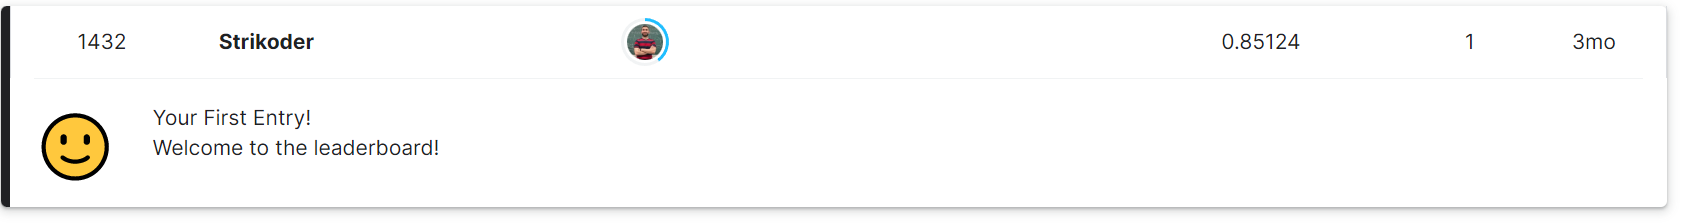